In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

## 서울시 구별 CCTV 현황분석

#### 1. 데이터 확보
+ Google -> 서울시 cctv 현황 검색해보니 데이터 많아
+ 인구별 CCTV 확인하는 것도 좋을 거 같아. 구별 인구 데이터 확보해봅시다.

In [10]:
#### cctv 자료

cctv = pd.read_csv("data/seoul/cctv.csv")
cctv.head(10)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [11]:
pop = pd.read_excel('data/seoul/Report.xls', usecols='B, D, G, J, N', header=2)
pop.head(10)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


## EDA & Preprocessing

In [22]:
#### 1. 칼럼명 변경

cctv.rename(columns={'기관명':'구별'}, inplace=True)
cctv.head(10)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [21]:
col_list = ['구별, 인구수, 한국인, 외국인, 고령자']
pop.columns=['구별', '인구수', '한국인', '외국인', '고령자']
pop.head(10)

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


In [26]:
#### 2. 어느 구에 CCTV가 가장 많이 설치되어있는가?

cctv.sort_values(by="소계", ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468
20,용산구,2096,1368,218,112,398
6,구로구,1884,1142,173,246,323
10,동대문구,1870,1070,23,198,579
16,성북구,1651,1009,78,360,204
22,종로구,1619,464,314,211,630


In [30]:
cctv['최근 증가율'] = ((cctv['2014년'] + cctv['2015년'] + cctv['2016년']) / cctv['2013년도 이전']) * 100
cctv.head(10)

cctv.sort_values(by='최근 증가율', ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


In [ ]:
#### 인구수 탐색

In [34]:
#### 필요없는 결측치, 이상치, 행, 열 제거
# 행을 지울 땐 del
# 열을 지울 땐 drop
print(pop)
print("="*50)
pop.drop([0], inplace=True)
pop

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


In [43]:
# 중복된 데이터 확인
print(len(pop["구별"].unique()))
print(pop["구별"].count()) #결측치를 빼고 계산

#두 값의 차이를 통해 결측치가 있음을 유추해볼 수 있다.

print(pop[pop["구별"].isnull()])
print(pop.isnull().sum())

26
25
     구별  인구수  한국인  외국인  고령자
26  NaN    0    0    0    0
구별     1
인구수    0
한국인    0
외국인    0
고령자    0
dtype: int64


In [46]:
pop.drop([26], inplace = True)
pop

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002
10,도봉구,345041,342861,2180,54293


In [47]:
pop.sort_values(by="인구수", ascending=False)

,구별,인구수,한국인,외국인,고령자
24,송파구,671994,665282,6712,77978
16,강서구,608361,601696,6665,77381
23,강남구,557865,552976,4889,65859
11,노원구,555803,551902,3901,75081
21,관악구,522292,504445,17847,70807
12,은평구,490253,485902,4351,75535
15,양천구,473087,469221,3866,56070
8,성북구,453902,442226,11676,66896
22,서초구,445164,440954,4210,54055
17,구로구,440396,408369,32027,59838


In [48]:
pop.sort_values(by="한국인", ascending=False)

,구별,인구수,한국인,외국인,고령자
24,송파구,671994,665282,6712,77978
16,강서구,608361,601696,6665,77381
23,강남구,557865,552976,4889,65859
11,노원구,555803,551902,3901,75081
21,관악구,522292,504445,17847,70807
12,은평구,490253,485902,4351,75535
15,양천구,473087,469221,3866,56070
8,성북구,453902,442226,11676,66896
22,서초구,445164,440954,4210,54055
25,강동구,438225,434027,4198,56983


In [49]:
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100

In [50]:
pop.sort_values(by="외국인비율", ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,403988,369128,34860,54704,8.628969,13.540996
18,금천구,253344,234238,19106,34640,7.541525,13.673109
17,구로구,440396,408369,32027,59838,7.272319,13.587317
2,중구,135139,126082,9057,21655,6.701988,16.024242
3,용산구,245411,229909,15502,37238,6.316750,15.173729
1,종로구,164348,154549,9799,26429,5.962348,16.081121
6,동대문구,364962,349308,15654,56284,4.289214,15.421880
5,광진구,371671,357149,14522,44470,3.907219,11.964883
13,서대문구,324871,312311,12560,49645,3.866150,15.281450
21,관악구,522292,504445,17847,70807,3.417054,13.556976


In [51]:
pop.sort_values(by="고령자비율", ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,327511,323862,3649,57002,1.114161,17.404606
1,종로구,164348,154549,9799,26429,5.962348,16.081121
2,중구,135139,126082,9057,21655,6.701988,16.024242
10,도봉구,345041,342861,2180,54293,0.631809,15.735231
6,동대문구,364962,349308,15654,56284,4.289214,15.421880
12,은평구,490253,485902,4351,75535,0.887501,15.407351
13,서대문구,324871,312311,12560,49645,3.866150,15.281450
3,용산구,245411,229909,15502,37238,6.316750,15.173729
8,성북구,453902,442226,11676,66896,2.572361,14.737983
7,중랑구,411552,406868,4684,59992,1.138131,14.577016


In [53]:
#### 인구 수 대비 CCTV 설치현황에 대해

#cctv 데이터와 인구수 데이터 확보


data_result = pd.merge(cctv, pop, on="구별")
data_result

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

data_result

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
5,광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883
6,구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317
7,금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109
8,노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563
9,도봉구,825,246.638655,345041,342861,2180,54293,0.631809,15.735231


In [57]:
df_index = data_result.set_index("구별")
df_index

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883
구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317
금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563


In [58]:
df_index.corr()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.230372,0.225689,0.027741,0.163106,-0.046570,-0.267835
최근 증가율,-0.264378,1.000000,-0.097766,-0.086856,-0.150683,-0.072493,-0.043434,0.193834
인구수,0.230372,-0.097766,1.000000,0.997991,-0.164788,0.938610,-0.593687,-0.626751
한국인,0.225689,-0.086856,0.997991,1.000000,-0.226943,0.937972,-0.640342,-0.617241
외국인,0.027741,-0.150683,-0.164788,-0.226943,1.000000,-0.174105,0.842769,-0.025187
고령자,0.163106,-0.072493,0.938610,0.937972,-0.174105,1.000000,-0.613892,-0.340203
외국인비율,-0.046570,-0.043434,-0.593687,-0.640342,0.842769,-0.613892,1.000000,0.229849
고령자비율,-0.267835,0.193834,-0.626751,-0.617241,-0.025187,-0.340203,0.229849,1.000000


In [59]:
# 상관계수를 알려주는 함수
# np.corrcoef

In [60]:
#### 중간 체크 포인트 만들어두기

# 팀간 작업 내용 공유하거나, 중단하고 다시 시작해야할 때

data_result.to_csv("data/seoul/cctv_result.csv", encoding="utf-8") # 가급적이면 utf-8로 저장해주는 것이 가장 좋다. 충돌이 가장 덜하다.

In [63]:
#### 중간 체크 포인트 불러와서 작업 이어가기

data_result = pd.read_csv("data/seoul/cctv_result.csv", index_col="구별")
del data_result['Unnamed: 0']
data_result


,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883
구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317
금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563


### 3. 시각화(Visualization)

<AxesSubplot:xlabel='구별'>

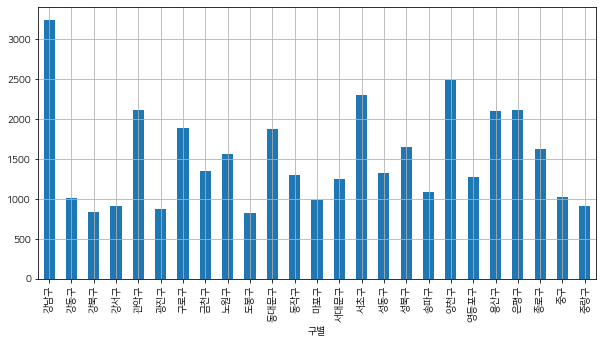

In [65]:
#### cctv가 많이 설치된 구 확인

data_result["소계"].plot.bar()
data_result["소계"].plot(kind="bar", figsize=(10,5), grid=True)

<AxesSubplot:ylabel='구별'>

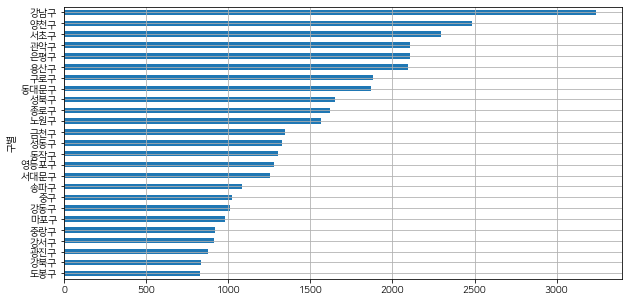

In [70]:
data_result["소계"].sort_values().plot(kind="barh", figsize=(10,5), grid=True)

In [71]:
#### 인구대비 CCTV 비율

data_result["cctv 비율"] = data_result["소계"]/data_result["인구수"]*100
data_result



,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율
구별,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,0.253732
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,0.403797
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883,0.236230
구로구,1884,64.973730,440396,408369,32027,59838,7.272319,13.587317,0.427797
금천구,1348,100.000000,253344,234238,19106,34640,7.541525,13.673109,0.532083
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563,0.281755


In [72]:
data_result.sort_values(by="cctv 비율")

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율
구별,,,,,,,,,
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973,0.160865
중랑구,916,79.960707,411552,406868,4684,59992,1.138131,14.577016,0.222572
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883,0.236230
도봉구,825,246.638655,345041,342861,2180,54293,0.631809,15.735231,0.239102
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,0.253732
마포구,980,212.101911,385624,374742,10882,50122,2.821920,12.997635,0.254134
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563,0.281755


<AxesSubplot:ylabel='구별'>

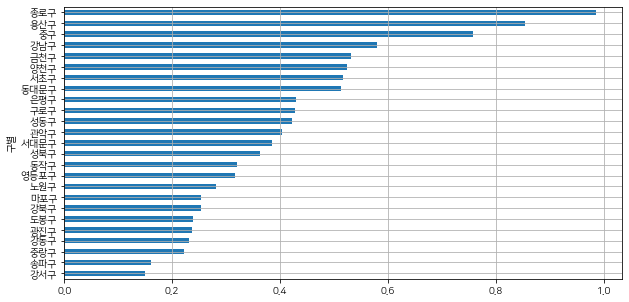

In [73]:
data_result["cctv 비율"].sort_values().plot(kind="barh", figsize=(10,5), grid=True)

<AxesSubplot:xlabel='인구수', ylabel='소계'>

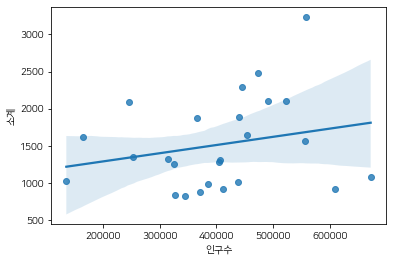

In [74]:
#### 회귀선을 그려서 결과를 조금 더 클래스있게 만들어보자.
# 인구별 적정 cctv 수는 어느 정도인지 등..
# 범죄율, 범죄예방율 등을 종합적으로 계산해야하나 여기선 생략
sns.regplot(x="인구수", y="소계", data=data_result)

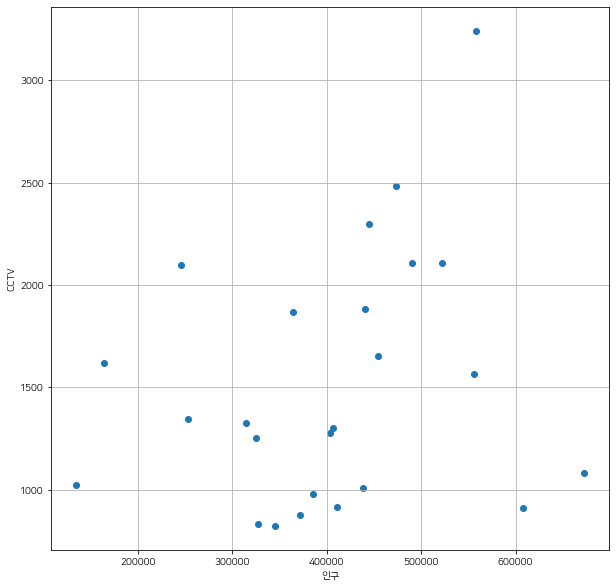

In [75]:
plt.figure(figsize=(10,10))

plt.scatter(x="인구수", y="소계", data=data_result)
plt.xlabel("인구")
plt.ylabel("CCTV")
plt.grid()

In [79]:
# regline = wx+b
# 이를 구하는 함수, np에서 제공
# np.polyfit
# 다만, R의 lm처럼 많은 기능을 담고 있지 않다. 가중치와 절편만 알 수 있다.

lm = np.polyfit(data_result["인구수"], data_result["소계"], 1)
print(lm)

# 회귀선 방정식을 return 해주는 명령어도 있다. np.poly1d()
fit1 = np.poly1d(lm)
print(fit1)

[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


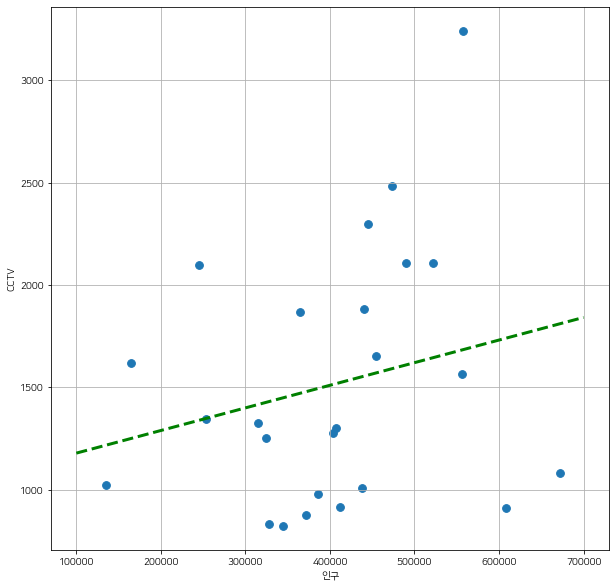

In [82]:
plt.figure(figsize=(10,10))

fx = np.linspace(100000, 700000, 100)

plt.scatter(x="인구수", y="소계", data=data_result, s=60)
#plt.plot(fx, lm[0] * fx + lm[1])
plt.plot(fx, fit1(fx), lw=3, color='g', ls='dashed')
plt.xlabel("인구")
plt.ylabel("CCTV")
plt.grid()

In [96]:
# 회귀선에서 많이 벗어난 value들을 찾자. 그리고 그 차이값들을 알아보자.
data_result["오차"] = data_result["소계"] -  fit1(data_result["인구수"])
abs(data_result["오차"])

구별
강남구     1553.296412
강동구      542.582309
강북구      599.318223
강서구      829.467513
관악구      463.580517
광진구      601.085154
구로구      329.020205
금천구        0.413852
노원구      116.426472
도봉구      624.677016
동대문구     398.323753
동작구      215.785071
마포구      514.493782
서대문구     173.402808
서초구      736.754790
성동구       89.006188
성북구       81.105210
송파구      729.738939
양천구      890.918761
영등포구     237.773581
용산구      756.346747
은평구      497.961942
종로구      368.866533
중구       194.877278
중랑구      607.126685
Name: 오차, dtype: float64

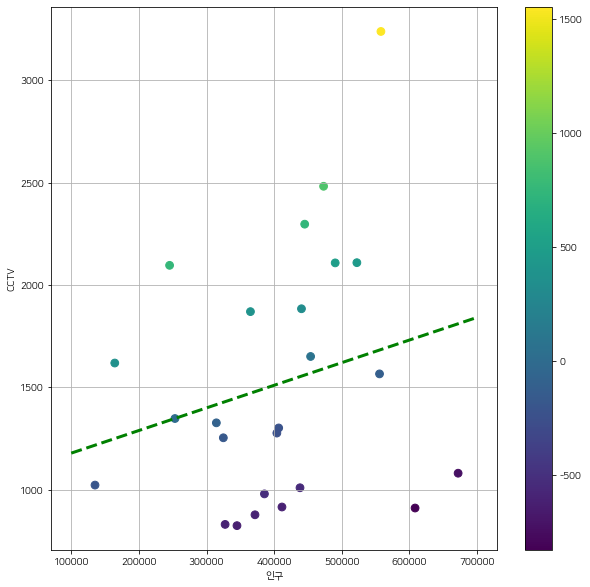

In [94]:
plt.figure(figsize=(10,10))

fx = np.linspace(100000, 700000, 100)

plt.scatter(x="인구수", y="소계", data=data_result, s=60, c=data_result['오차'])
#plt.plot(fx, lm[0] * fx + lm[1])
plt.plot(fx, fit1(fx), lw=3, color='g', ls='dashed')
plt.xlabel("인구")
plt.ylabel("CCTV")
plt.grid()
plt.colorbar()

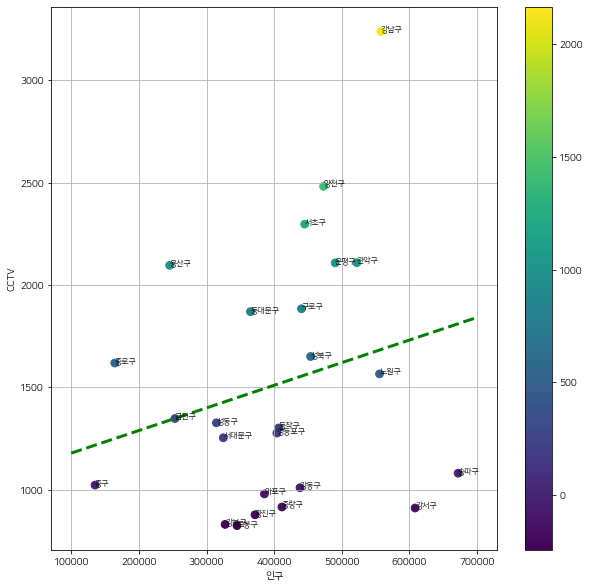

In [92]:
# 반복문을 이용해 점에다가 구 이름 뿌려주기
plt.figure(figsize=(10,10))

fx = np.linspace(100000, 700000, 100)

plt.scatter(x="인구수", y="소계", data=data_result, s=60, c=data_result['오차'])
#plt.plot(fx, lm[0] * fx + lm[1])
plt.plot(fx, fit1(fx), lw=3, color='g', ls='dashed')
plt.xlabel("인구")
plt.ylabel("CCTV")
plt.grid()
plt.colorbar()

for i in range(25):
    plt.text(data_result["인구수"][i], data_result["소계"][i], data_result.index[i], fontsize = 8)

In [97]:
#### 최종 df 결과물 저장

data_result.to_csv("data/seoul/data_result.csv")